# Ejercicio 4
### 19. Las bombillas eléctricas de un fabricante A tiene una duración media a 1400 horas con una desviación típica de 200 horas, mientras que las de otro fabricante B tiene una duración media de 1200 horas con una desviación típica de 100 horas. Si se toman muestras al azar de 125 bombillas de cada fabricante, ¿cual es la probabilidad de que las bombillas de A tengan una duración media que sea al menos(a) 160 horas, (b) 250 horas mas quelas bombillas de R?

## Paso 1. Identificación de las variables.
### Existe $x_{1}$ 

## Paso 2. La distribución de probabilidad. 
Los experimentos se realizaran con distribución normal.

## Paso 3. Modele las variables aleatorias.
## $x_{1} \sim N(1400,200)$

## Paso 4. Define el modelo del sistema y los objetivos de la simulación.
## Para el experimento "a" se realizara la comparación de que cada foco su media sea mayor a 160
## $P(160 \leq x)$

In [274]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [275]:
def mayor160():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    supera=0                      
    x_1 = random.gauss(1400,200)    #La funcion gauss genera un número que sigue una distribucion normal con media 1400 & 
    if 160 <= x_1:                  #Desviación típica 200.   
        supera += 1
    return supera

In [276]:
mayor160()

1

## 5. Diseño del experimento. 
## Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa la probabilidad de que la media sea al menos 160.

In [277]:
def prob_supera(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    super = 0                       # estimada al contar las veces que al menos son 160 horas y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        super += mayor160()
        prob.append(super/(i+1))
    return prob

In [278]:
X = prob_supera(125)                # Asignamos valores a n y realizamos el experimento, en este caso solamente son 125 bombillas

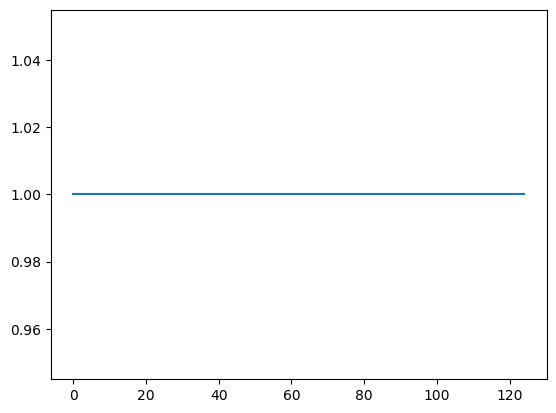

In [279]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

## Nota: Se observa un comportamiento lineal en $ y=1 $ debido a que facilmente el tiempo de duración de los focos es más de 160 horas, la probabilidad es $100\% $ comprobandolo.

In [280]:
lista = []
for i in range(1000000):
        s = random.gauss(1400,200)
        lista.append(np.mean(s))   
print(min(lista))


500.6023929489238


## de 1,000,000 de bombillas analizadas, el minimo de horas que dio para una bombilla fue la indicada arriba lo que indica que todas las bombillas van a superar las 160 horas. Talvez el planteamiento del problema no son 160 horas sino 1600 horas y entonces se obtienen los siguientes resultados.

In [281]:
def mayor1600():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    supera=0                      
    x_1 = random.gauss(1400,200)    #La funcion gauss genera un número que sigue una distribucion normal con media 1400 & 
    if 1600 <= x_1:                  #Desviación típica 200.   
        supera += 1
    return supera

In [282]:
mayor1600()

0

In [283]:
def prob_supera(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    super = 0                       # estimada al contar las veces que al menos son 160 horas y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        super += mayor1600()
        prob.append(super/(i+1))
    return prob

In [284]:
X = prob_supera(125)    #Se hace para un valor de 125 bombillas.

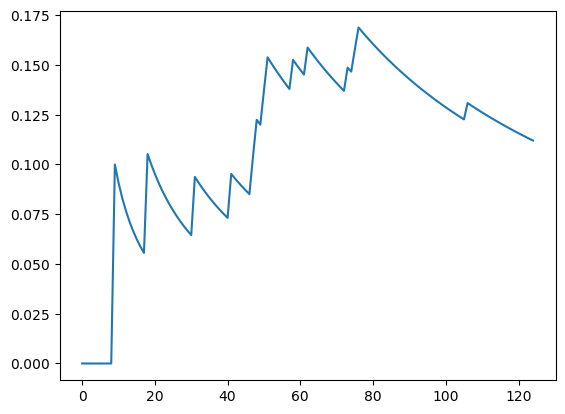

In [285]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con proximadamente 700 
                                    #iteraciones pero solamente nos piden 125

## El comportamiento de la gráfica ya no es lineal debido a que ahora existen bombillas que su media es menor a 1600 horas.
# La probabilidad es aproximadamente $16\%$ de la piezas superan las 1600 horas

## 6.Repite el experimento $n$ veces 

In [286]:
def modelo1(n):
    lista2=[]
    for i in range(n):
        m = prob_supera(125)
        lista2.append(np.mean(m))
    return lista

In [287]:
Y= modelo1 (125)

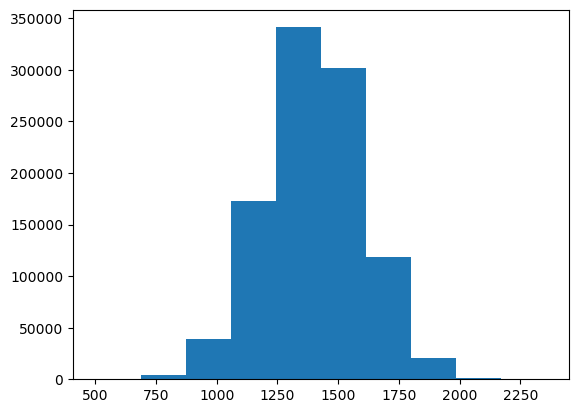

In [288]:
plt.hist(Y)
plt.show()

## La media de las horas de las bombillas y su desviación estandar.

In [289]:
print(np.mean(Y), np.std(Y))

1400.092114639928 200.00443909437985


## Paso 7. Intervalo de confianza. 


In [290]:
li=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50) # Limite inferior del intervalo de confianza.
ls=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) # Límite superior del intervalo de confianza.
if li<= np.mean(Y)<= ls:
    print("Límite inferior:", li,"Media:",np.mean(Y),"Límite superior:",ls)
    print("Se acepta la hipótesis nula de que 16% de las piezas al menos superan las 1600 horas con una confiabilidad del 95%")
else: print("Con una confiabilidad del 95% las piezas no superan las 1600 horas.")

Límite inferior: 1344.6537125407174 Media: 1400.092114639928 Límite superior: 1455.5305167391386
Se acepta la hipótesis nula de que 16% de las piezas al menos superan las 1600 horas con una confiabilidad del 95%


# Inciso "b" las bombillas de A superan en 250 horas a las bombillas de B?

## Paso 1, 2 y 3.
### Ahora seran dos variables $x_{1}$, $x{_2}$ dónde 
### $x_{1} \sim N(1400,200), x_{2} \sim N(1200,100)$

## Paso 4.
### El modelo del sistema:
### La diferencia de $x_{1}$ y $x_{2}$ modela adecuadamente el sistema.

### Si $x_{1}-x_{2} > 250$ indica que las bombillas de A superan en 250 horas a las de B.
### Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una estimación de la probabilidad de que las bombillas de $A$ superen en 250 horas a las de $B$.
### Una forma de implementarlo es mediante el siguiente código.

In [291]:
def A_mayor_B():                #Esta función devuelve el valor 1 si A>B por 250 horas, 0 si no la hay.
    sucede=0                      
    x_1 = random.gauss(1400,200)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1200,100)   # la media y la desvicion estandar especificados.
    if 250 < x_1 - x_2:
        sucede += 1
    return sucede

In [292]:
A_mayor_B()

0

## Paso 5. Diseño del experimento
Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa la probabilidad de que las piezas de A superen a las de B en 250 horas.

In [293]:
def prob_cumple(n):                    
    prob1 = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    sucede = 0                       # estimada al contar las veces que hay de que A supere a B en 250 horas y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        sucede += A_mayor_B()
        prob1.append(sucede/(i+1))
    return prob1

In [294]:
X1 = prob_cumple(125)                # Asignamos valores a n y realizamos el experimento


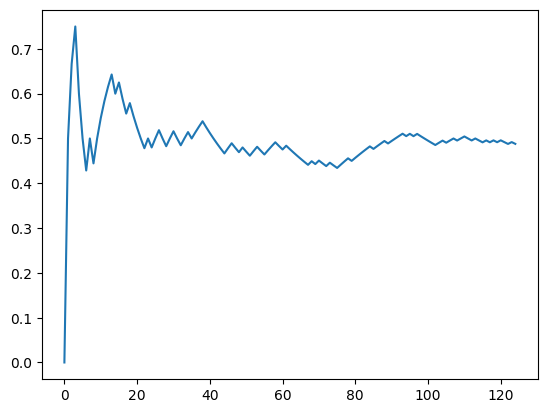

In [295]:
plt.plot(X1)                         # La gráfica muestra que la convergencia está garantizada con 600 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

# La probabilidad de que las piezas de A superen en 250 horas a las de B es:

In [296]:
print("El", np.mean(X1), "% de las bombillas De A superan a las de B con desviación estandar:",np.std(X1))

El 0.4936253071411426 % de las bombillas De A superan a las de B con desviación estandar: 0.06417368244846579


## Paso 6. Repitiendo el experimento $n$ veces.


In [297]:
def modeloAB(n):
    listaAB=[]
    for i in range(n):
        s = prob_cumple(125)
        listaAB.append(np.mean(s))
    return lista

In [298]:
YAB=modeloAB(125)

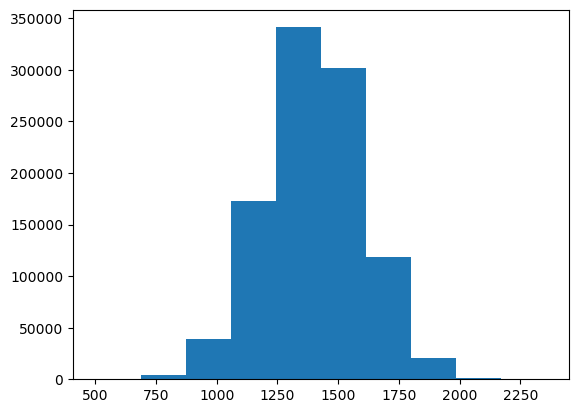

In [299]:
plt.hist(YAB)
plt.show()

In [300]:
print(np.mean(YAB), np.std(YAB))

1400.092114639928 200.00443909437985


In [301]:
li=np.mean(YAB) - 1.96*np.std(YAB)/np.sqrt(50) # Limite inferior del intervalo de confianza.
ls=np.mean(YAB) + 1.96*np.std(YAB)/np.sqrt(50) # Límite superior del intervalo de confianza.
if li<= np.mean(YAB)<= ls:
    print("Límite inferior:", li,"Media:",np.mean(Y),"Límite superior:",ls)
    print("Se acepta la hipótesis nula de que 16% de las piezas al menos superan las 1600 horas con una confiabilidad del 95%")
else: print("Con una confiabilidad del 95% las piezas no superan las 1600 horas.")

Límite inferior: 1344.6537125407174 Media: 1400.092114639928 Límite superior: 1455.5305167391386
Se acepta la hipótesis nula de que 16% de las piezas al menos superan las 1600 horas con una confiabilidad del 95%


# Ejercicio 4 por análisis.

# Inciso A) 
### para 160  horas $x_{1} \sim N(1400,200)$ se calcula $P(160 \leq  x_{1}) = P(\tfrac{160-1400}{200} \leq z)= P(-6.2\leq z)=1$ 
###  para 1600  horas. $x_{1} \sim N(1400,200)$ se calcula $P(1600 \leq  x_{1}) = P(\tfrac{1600-1400}{200} \leq z)= P(1 \leq z )=1-P(z<1)=0.15870$ 


# Inciso B) para 160  horas. $x_{1} \sim N(1400,200), x_{2} \sim N(1200,100)$
### Dado que $x_{1}$ y $x_{2}$ son variables aleatorias independientes y siguen distribuciones normales, la diferencia entre ellas, $Y = x_{1} - x_{2}$, también sigue una distribución normal.
### La media de Y es la diferencia de las medias de $x_{1}$ y $x_{2}: 1400 - 1200 = 200$
### La varianza de Y es la suma de las varianzas de $x_{1}$ y $x_{2}= 200^2 + 100^2 = 50000$ desviación estandar= $ \sqrt {50000}≈ 223.61$
### $Y \sim N(200,223.61)$
### Analogamente se hacen los calculos igual que en A dónde $P(Y>250)=1-P(Y \leq 0.2236)= 1-0.4129=41.05\%.$